<a href="https://colab.research.google.com/github/Gkimatov/CS-460/blob/main/460_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
 import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
#this command will download the file
!gdown --id 1es5kvNIhxMnw0nSFrWAZskxiVECzkvkG

Downloading...
From: https://drive.google.com/uc?id=1es5kvNIhxMnw0nSFrWAZskxiVECzkvkG
To: /content/NYC_data_clean.csv
100% 278M/278M [00:01<00:00, 164MB/s]


In [76]:
df=pd.read_csv('NYC_data_clean.csv')

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3881989 entries, 0 to 3881988
Data columns (total 8 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Unnamed: 0       int64         
 1   arrest_date      datetime64[ns]
 2   offense          object        
 3   offense_level    object        
 4   age_group        object        
 5   perp_sex         object        
 6   arrest_boro      object        
 7   arrest_precinct  int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 236.9+ MB


In [107]:
df['arrest_date']=pd.to_datetime(df['arrest_date'])

In [108]:
arrest_year=df['arrest_date'].dt.year

In [109]:
len(arrest_year)

3881989

In [110]:
arrest_year.value_counts(ascending=True)

2019    161878
2018    184860
2017    225419
2016    250745
2015    259333
2006    287856
2013    298305
2012    303697
2014    304175
2007    313739
2008    319502
2009    323116
2010    323694
2011    325670
Name: arrest_date, dtype: int64

In [111]:
df['offense_level'] = df['offense_level'].map({ 'F':'Felony',
                                                'M':'Misdemeanor',
                                                'V':'Violation',
                                                'I':'Infractions'})
df['arrest_boro'] = df['arrest_boro'].map({'K':'Brooklyn',
                                           'B':'Bronx',
                                           'M':'Manhattan',
                                           'Q':'Queens',
                                           'S':'Staten Island'})

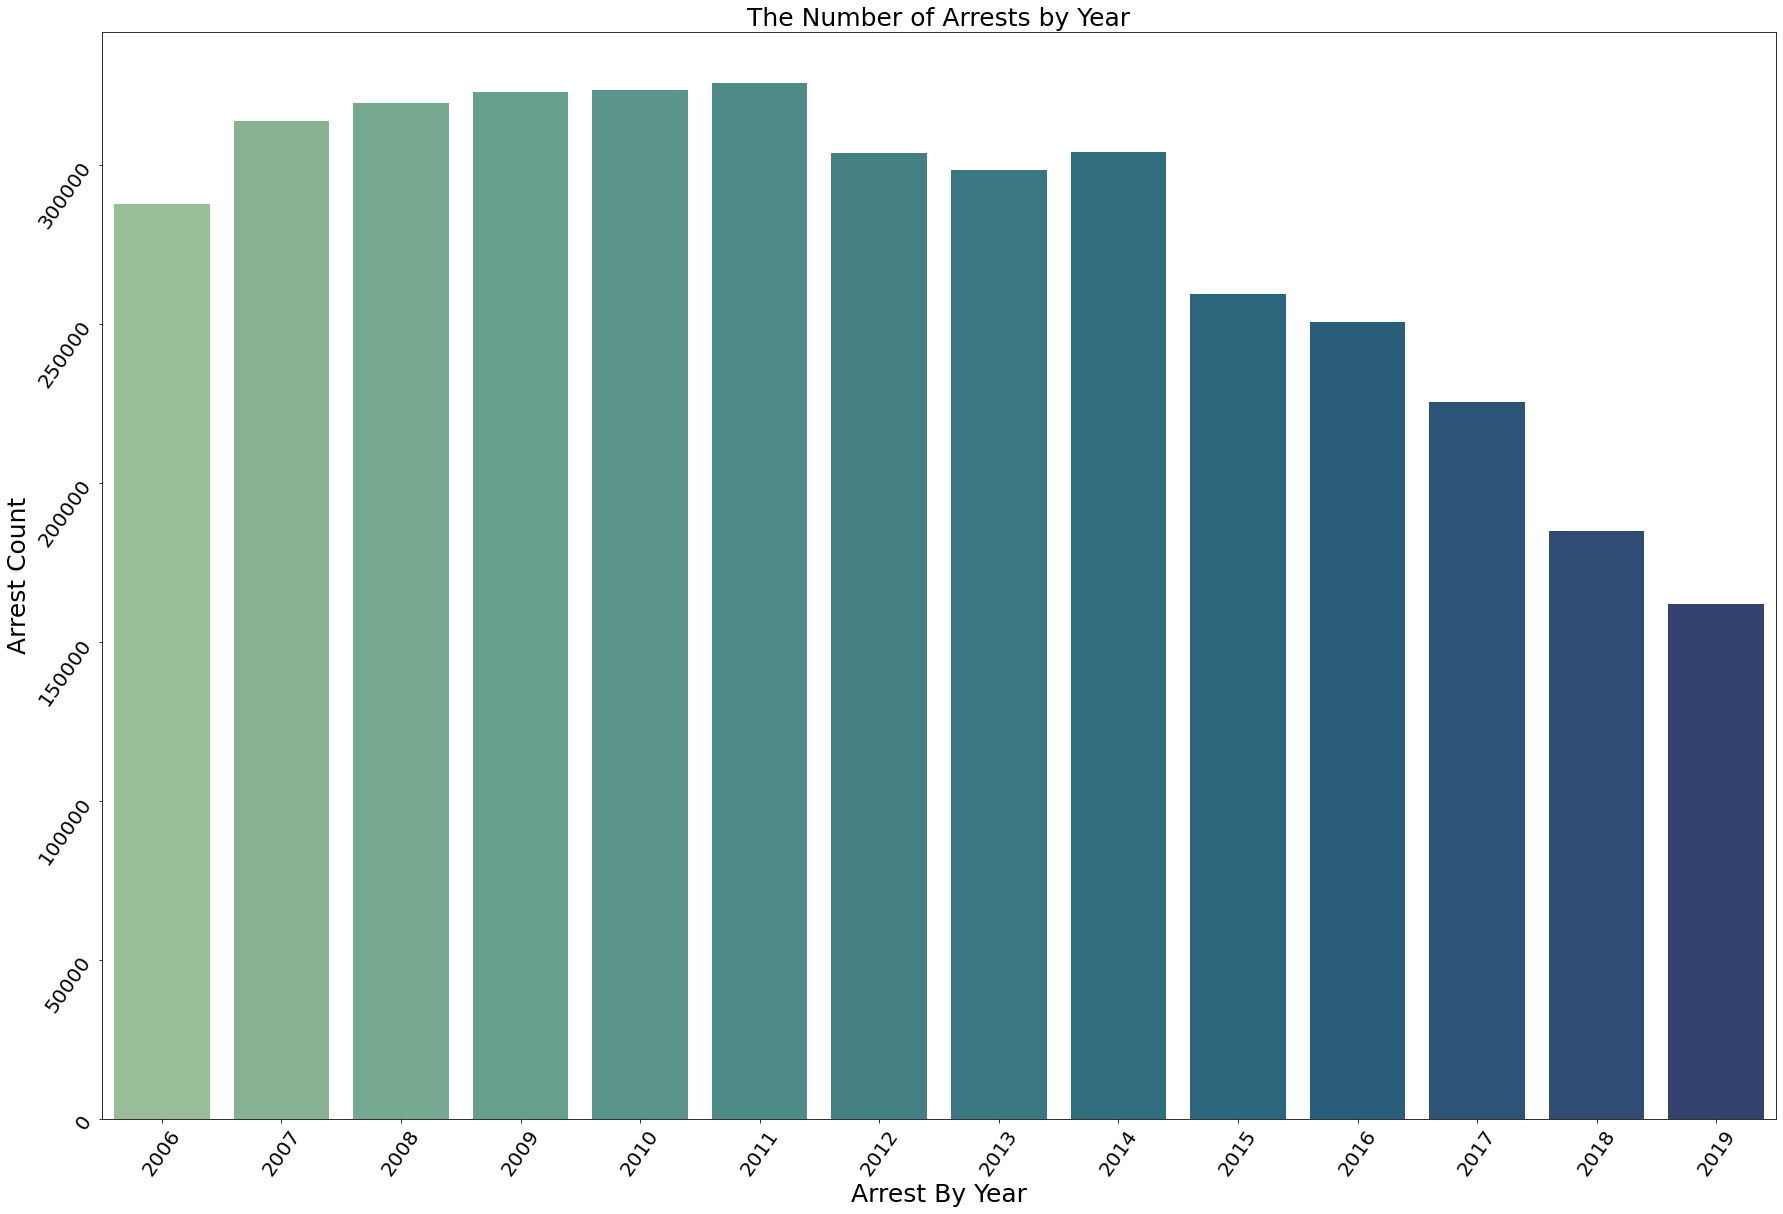

In [112]:
plt.figure(figsize=(30,20))
sns.countplot(x=arrest_year, palette='crest')
_ = plt.title('The Number of Arrests by Year',fontsize=25)
_ = plt.xlabel('Arrest By Year',fontsize=25)
_ = plt.ylabel('Arrest Count',fontsize=25)
_ = plt.yticks(fontsize=20,rotation=55)
_ = plt.xticks(fontsize=20,rotation=55)

***As we can see by value count the number of crime was higher in 2011 and the lowest rate was in 2019 in the overall NYC.***

In [113]:
plt.figure(figsize=(30,20))
sns.countplot(x=arrest_year,hue=df['arrest_boro'],palette='Paired')
_ = plt.title('The Number of Arrests Per Year by Borough',fontsize=25)
_ = plt.xlabel('Arrest By Year',fontsize=25)
_ = plt.ylabel('Arrest Count',fontsize=25)
_ = plt.legend(loc="upper right",fontsize=25)
_ = plt.xticks(fontsize=20)
_ = plt.yticks(fontsize=20,rotation=55)

ValueError: ignored

<Figure size 2160x1440 with 0 Axes>

***As we can see in every year from 2006 to 2019 consistently the crime rate is higher in Brooklyn followed by Manhattan, Bronx, Queens and Staten Island***

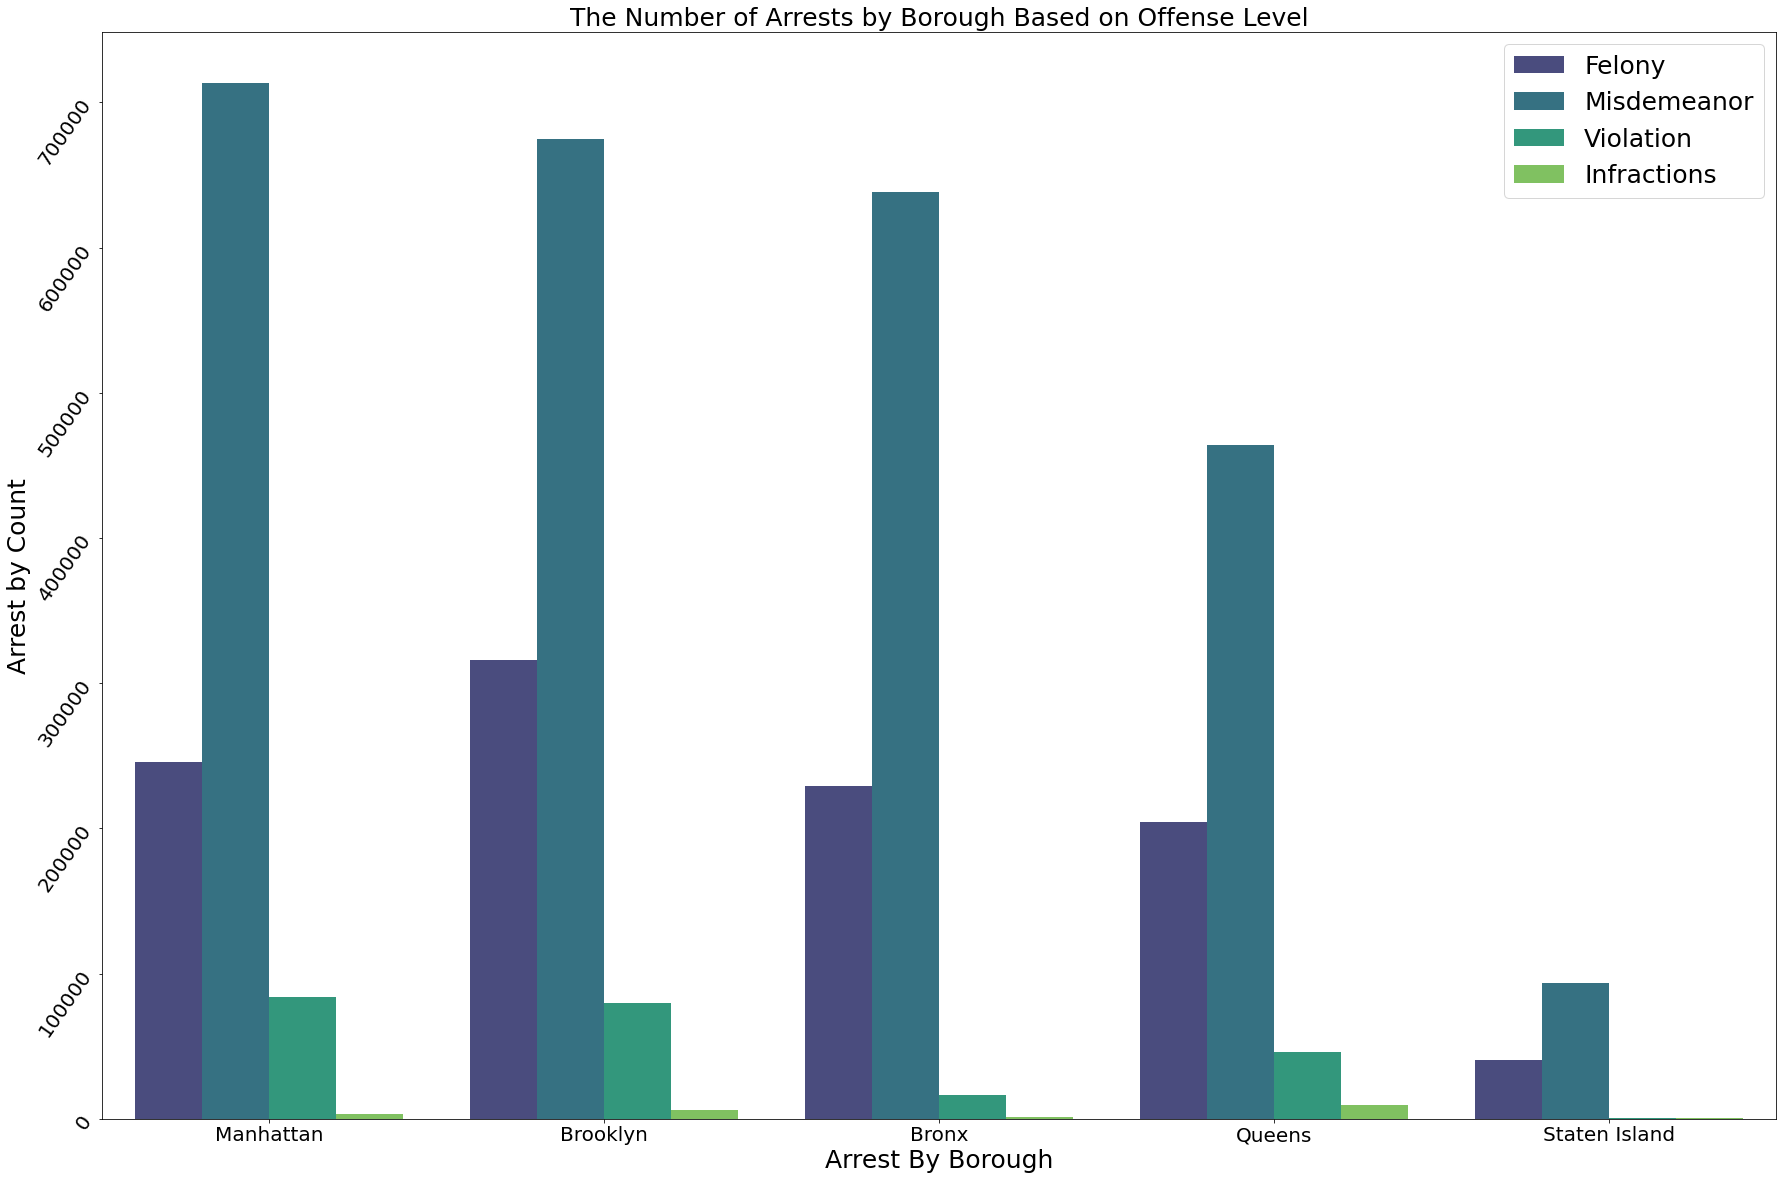

In [ ]:
plt.figure(figsize=(30,20))
sns.countplot(x=df['arrest_boro'],hue=df['offense_level'],palette='viridis')
_ = plt.title('The Number of Arrests by Borough Based on Offense Level',fontsize=25)
_ = plt.xlabel('Arrest By Borough',fontsize=25)
_ = plt.ylabel('Arrest by Count',fontsize=25)
_ = plt.legend(loc="upper right",fontsize=25)
_ = plt.xticks(fontsize=20)
_ = plt.yticks(fontsize=20,rotation=55)

***As we can see the Misdemeanor crime is higher in every borough and then followed by Felony, Violation and Infractions.***

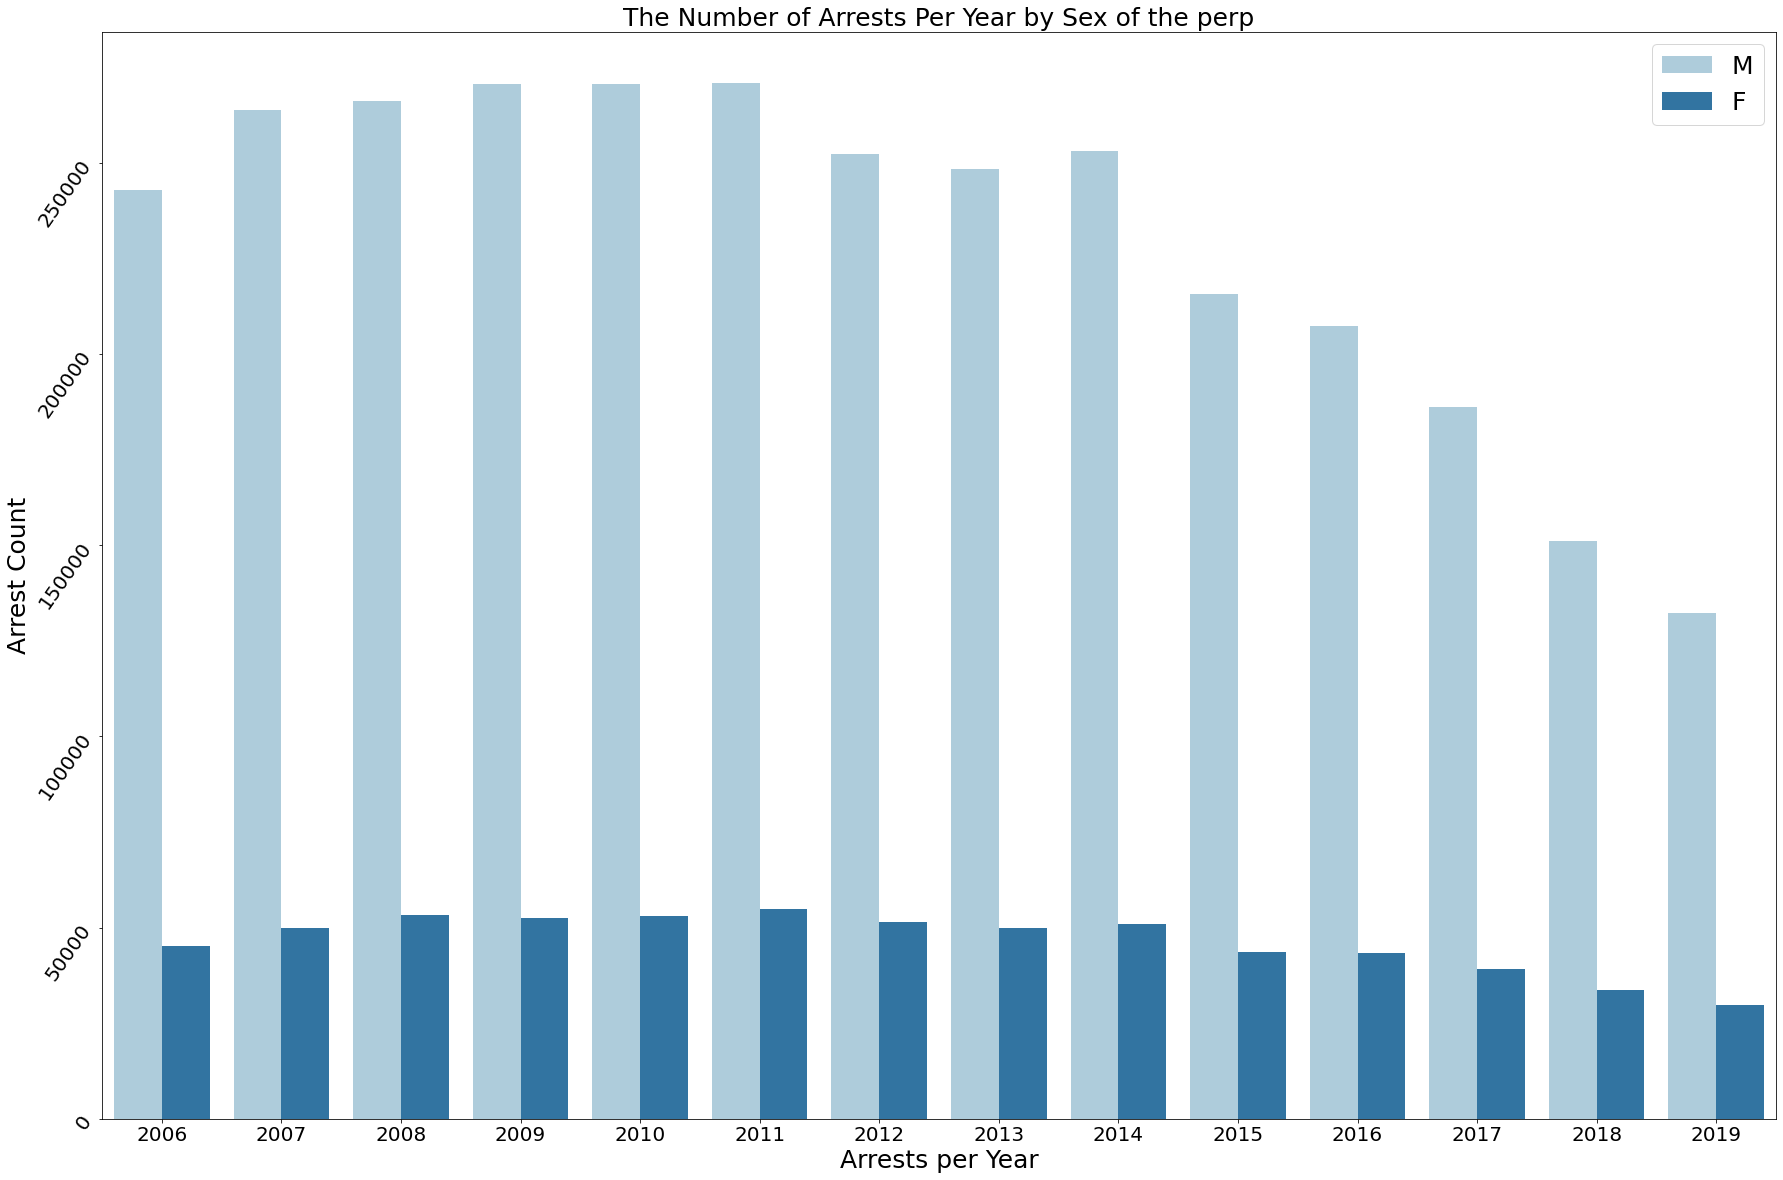

In [84]:
plt.figure(figsize=(30,20))
sns.countplot(x=arrest_year,hue=df['perp_sex'],palette='Paired')
_ = plt.title('The Number of Arrests Per Year by Sex of the perp',fontsize=25)
_ = plt.xlabel('Arrests per Year',fontsize=25)
_ = plt.ylabel('Arrest Count',fontsize=25)
_ = plt.legend(loc="upper right",fontsize=25)
_ = plt.xticks(fontsize=20)
_ = plt.yticks(fontsize=20,rotation=55)

***As we can see, consistently throughtout the years males commited significantly more crimes than females***

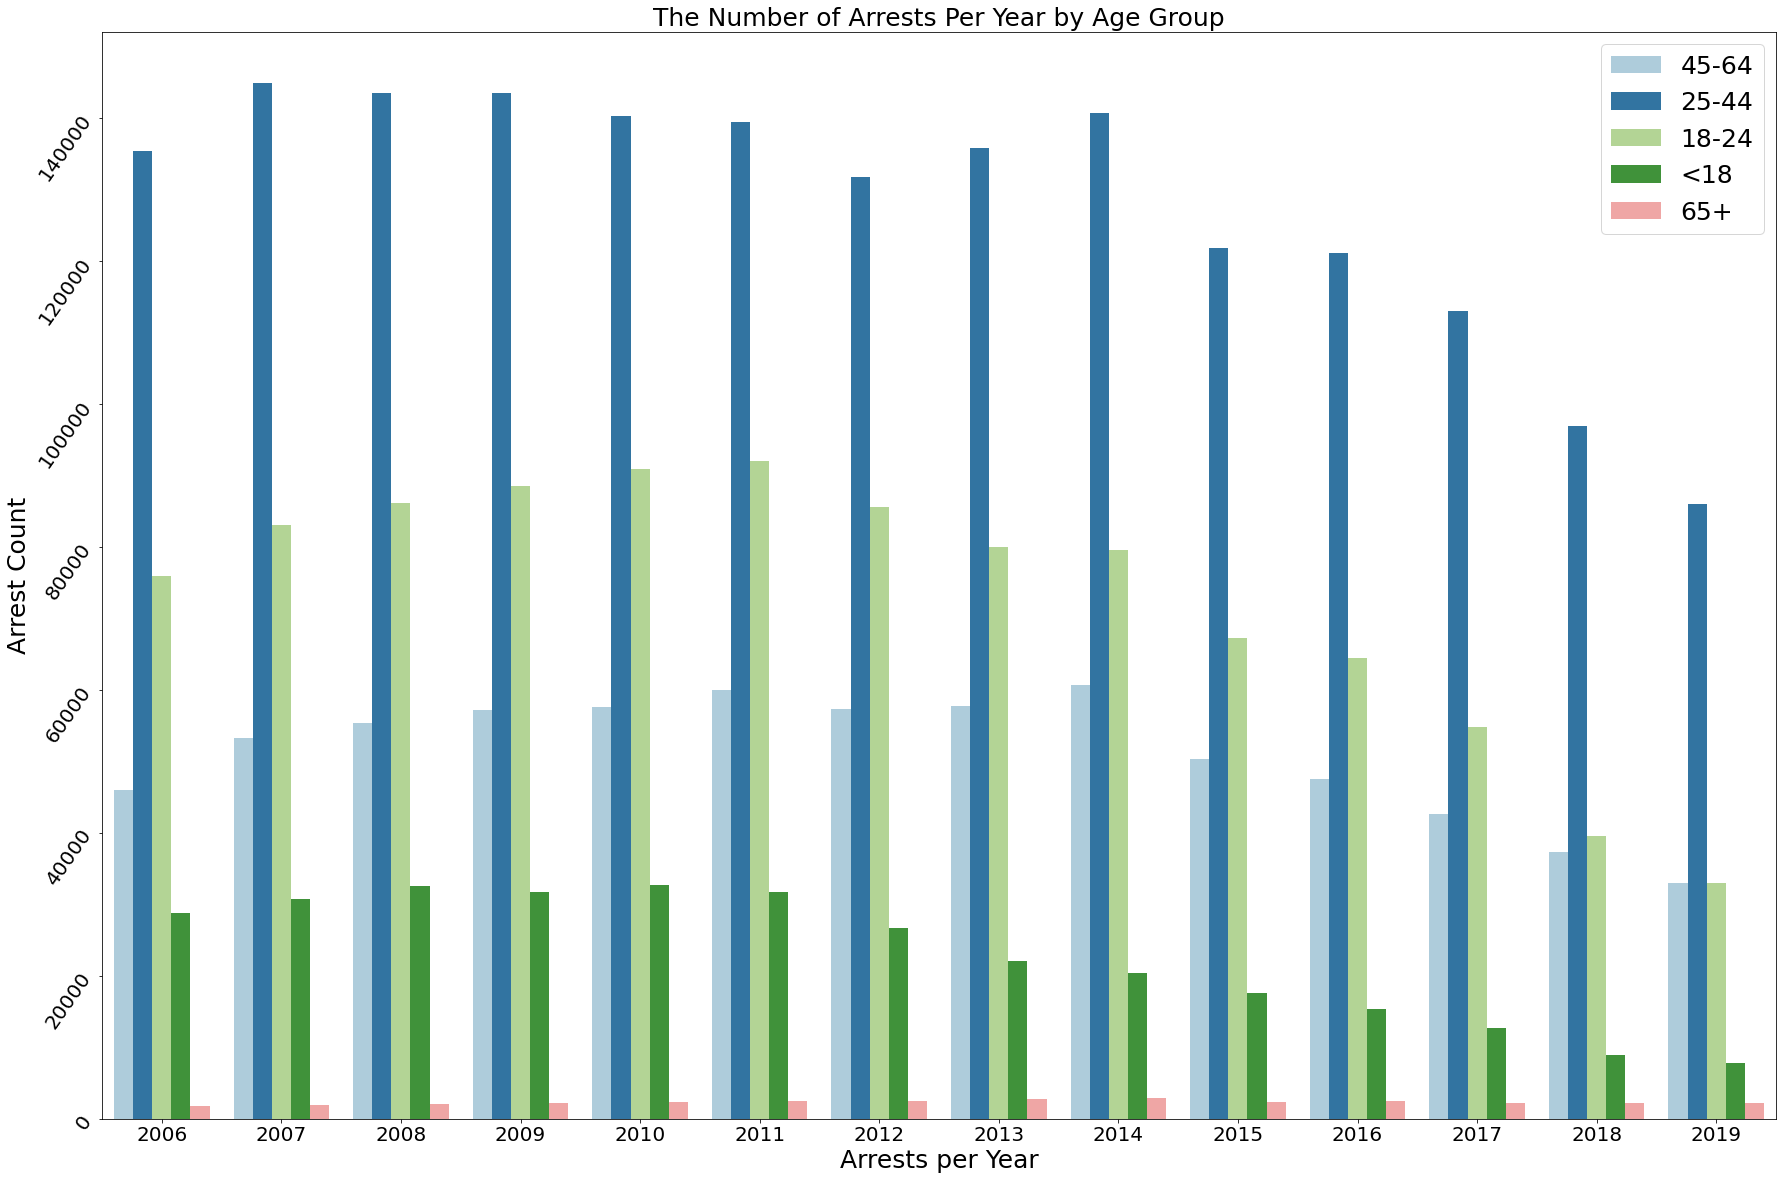

In [85]:
plt.figure(figsize=(30,20))
sns.countplot(x=arrest_year,hue=df['age_group'],palette='Paired')
_ = plt.title('The Number of Arrests Per Year by Age Group',fontsize=25)
_ = plt.xlabel('Arrests per Year',fontsize=25)
_ = plt.ylabel('Arrest Count',fontsize=25)
_ = plt.legend(loc="upper right",fontsize=25)
_ = plt.xticks(fontsize=20)
_ = plt.yticks(fontsize=20,rotation=55)

***As we can see 25-44 is the most commmon age group of the perp followed by 18-24, 45-64, <18, 65+***

In [87]:
df['offense'].value_counts()[:10]

DANGEROUS DRUGS                    835598
ASSAULT 3 & RELATED OFFENSES       380510
OTHER OFFENSES RELATED TO THEFT    235898
OTHER STATE LAWS                   187193
PETIT LARCENY                      162330
VEHICLE AND TRAFFIC LAWS           154971
CRIMINAL TRESPASS                  154807
FELONY ASSAULT                     152031
DANGEROUS WEAPONS                  148065
MISCELLANEOUS PENAL LAW            136695
Name: offense, dtype: int64

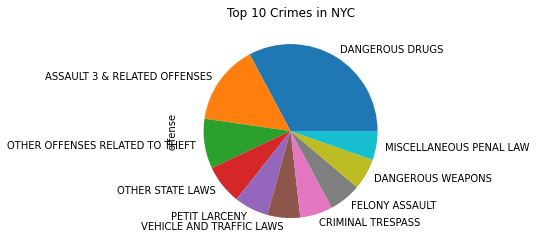

In [95]:
df['offense'].value_counts()[:10].plot(kind="pie", title="Top 10 Crimes in NYC")

In [96]:
df.loc[df['arrest_boro'] == 'Queens', 'offense'].value_counts()[:10]

Series([], Name: offense, dtype: int64)

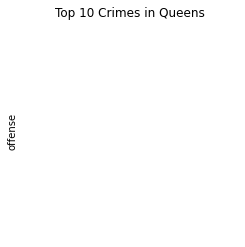

In [97]:
df.loc[df['arrest_boro'] == 'Queens', 'offense'].value_counts()[:10].plot(kind="pie", title="Top 10 Crimes in Queens")

In [99]:
df.loc[df['arrest_boro'] == 'Brooklyn', 'offense'].value_counts()[:10]

Series([], Name: offense, dtype: int64)

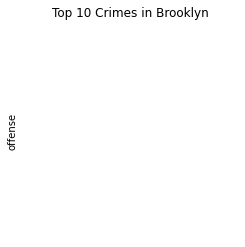

In [100]:
df.loc[df['arrest_boro'] == 'Brooklyn', 'offense'].value_counts()[:10].plot(kind="pie", title="Top 10 Crimes in Brooklyn")

In [ ]:
df.loc[df['arrest_boro'] == 'Bronx', 'offense'].value_counts()[:10]

DANGEROUS DRUGS                           241916
ASSAULT 3 & RELATED OFFENSES              100271
OTHER OFFENSES RELATED TO THEFT            59422
CRIMINAL TRESPASS                          55664
DANGEROUS WEAPONS                          41153
FELONY ASSAULT                             38926
OFFENSES AGAINST PUBLIC ADMINISTRATION     35123
VEHICLE AND TRAFFIC LAWS                   34859
PETIT LARCENY                              32396
ROBBERY                                    29031
Name: ofns_desc, dtype: int64

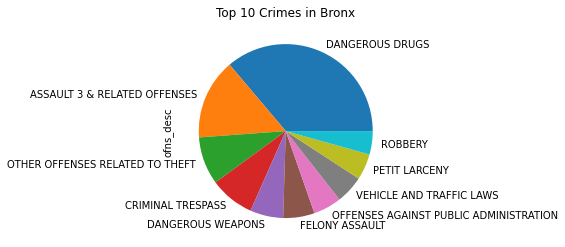

In [ ]:
df.loc[df['arrest_boro'] == 'Bronx', 'offense'].value_counts()[:10].plot(kind="pie", title="Top 10 Crimes in Bronx")

In [ ]:
df.loc[df['arrest_boro'] == 'Manhattan', 'offense'].value_counts()[:10]

DANGEROUS DRUGS                     195813
OTHER OFFENSES RELATED TO THEFT      89836
ASSAULT 3 & RELATED OFFENSES         71066
OTHER STATE LAWS                     69289
PETIT LARCENY                        59496
POSSESSION OF STOLEN PROPERTY 5      53557
CRIMINAL TRESPASS                    44741
VEHICLE AND TRAFFIC LAWS             41227
GRAND LARCENY                        38139
OTHER STATE LAWS (NON PENAL LAW)     36419
Name: ofns_desc, dtype: int64

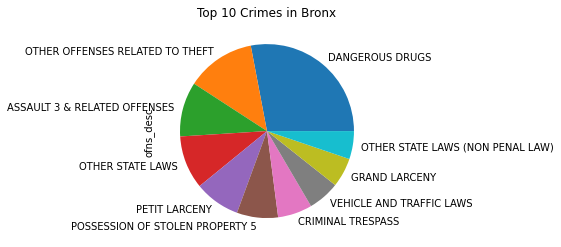

In [ ]:
df.loc[df['arrest_boro'] == 'Manhattan', 'offense'].value_counts()[:10].plot(kind="pie", title="Top 10 Crimes in Manhattan")

In [ ]:
df.loc[df['arrest_boro'] == 'Staten Island', 'offense'].value_counts()[:10]

DANGEROUS DRUGS                           32288
ASSAULT 3 & RELATED OFFENSES              15576
PETIT LARCENY                              7300
VEHICLE AND TRAFFIC LAWS                   7262
CRIMINAL MISCHIEF & RELATED OFFENSES       6333
OFFENSES AGAINST PUBLIC ADMINISTRATION     6200
MISCELLANEOUS PENAL LAW                    6154
INTOXICATED & IMPAIRED DRIVING             5646
DANGEROUS WEAPONS                          5612
FELONY ASSAULT                             5370
Name: ofns_desc, dtype: int64

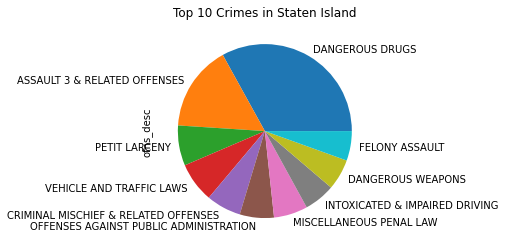

In [ ]:
df.loc[df['arrest_boro'] == 'Staten Island', 'offense'].value_counts()[:10].plot(kind="pie", title="Top 10 Crimes in Staten Island")

In [105]:
# test for nested pie chart
df.loc[df['arrest_boro'] == 'Staten Island', 'offense'].value_counts()[0] / df.loc[df['arrest_boro'] == 'Staten Island', 'offense'].value_counts()[:10].sum()

IndexError: ignored

In [70]:
df.loc[df['arrest_boro'] == 'Staten Island', 'offense'][:10]

21                         MISCELLANEOUS PENAL LAW
30                                 DANGEROUS DRUGS
45                                            RAPE
58                                           ARSON
91                    ASSAULT 3 & RELATED OFFENSES
97     OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV
107                                      TERRORISM
125                              CRIMINAL TRESPASS
180                   ASSAULT 3 & RELATED OFFENSES
202                                        ROBBERY
Name: ofns_desc, dtype: object

In [102]:
# add nested pie chart here
labels = ['Queens', 'Brooklyn', 'Bronx', 'Manhattan', 'Staten Island']
sizes = [0.2, 0.2, 0.2, 0.2, 0.2]

labels_top10_crimes = df.loc[df['arrest_boro'] == 'Queens', 'offense'][:10].append(df.loc[df['arrest_boro'] == 'Brooklyn', 'offense'][:10])
labels_top10_crimes.append(df.loc[df['arrest_boro'] == 'Bronx', 'offense'][:10])
labels_top10_crimes.append(df.loc[df['arrest_boro'] == 'Manhattan', 'offense'][:10])
labels_top10_crimes.append(df.loc[df['arrest_boro'] == 'Staten Island', 'offense'][:10])

sizes_top10_crimes = []
for j in labels:
  for i in range(10):
    sizes_top10_crimes.append(df.loc[df['arrest_boro'] == j, 'offense'].value_counts()[i] / df.loc[df['arrest_boro'] == j, 'offense'].value_counts()[:10].sum())

# Plot
plt.pie(sizes, labels=labels, startangle=90,frame=True)
plt.pie(sizes_top10_crimes,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

IndexError: ignored